# **Introdução**

Criado em 1998, o Exame Nacional do Ensino Médio (ENEM) é uma das maiores provas do mundo atrás apenas do Gaokao, o vestibular chinês[1], sendo em muitos casos tão preciso quanto o proprio senso demográfico realizado pelo IBGE, tendo em vista que o ENEM é realizado anualmente. O objetivo desta prova é avaliar o conhecimento dos alunos ao fim do ensino médio. Mas também serve como validação de conhecimento para algumas pessoas que não conseguiram concluir o ensino médio e algumas universidades/faculdades do país adotam a nota do enem como única forma de ingresso.

# **Preparação dos Dados**
Vou descrever em detalhes como organizei o dataset microdados 2019.


# **Bibliotecas**
Importo as bibliotecas que serão utilizadas.


In [38]:
# importa a biblioteca

from tabulate import tabulate
from matplotlib.cm import get_cmap
import string
import gc  
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install -U pandas-profiling
!pip install sweetviz
!pip install autoviz
!pip install line-profiler
!pip install nb-black
!pip install ipython
!pip install pywaffle
import IPython
from scipy import stats
from statsmodels.stats import diagnostic
from pywaffle import Waffle
import folium
import pandas as pd
import numpy as np
import pandas_profiling
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from pandas_profiling import ProfileReport
import line_profiler
profile = line_profiler.LineProfiler()
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn import linear_model
import sys
import os 
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
from pandas import DataFrame, Series
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings('ignore')

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=bfb6d5027019583b5f57f60285ca759c9aa8001e47a60f5d4451fa86d723ffb8
  Stored in directory: /tmp/pip-ephem-wheel-cache-g5i1qs1r/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling
Requirement already up-to-date: pandas-profiling[notebook] in /usr/local/lib/python3.6/dist-packages (2.9.0)
     |████████████████████████████████| 112kB 3.9MB/s 
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.9.0)


In [148]:
plt.style.use('seaborn-colorblind')

#ver os estilos disponíveis, para escolher o seaborn-colorblind que é bonitinho 
plt.style.available

# Mostrar todas as colunas da base:
pd.set_option('display.max_columns', None)

# ler a base de dados
Enem_dados = pd.read_csv('/content/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

# Informações básicas
print(f'Registros: {len(Enem_dados)}\nVariáveis: {len(Enem_dados.columns)}')

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Registros: 14058
Variáveis: 136


In [149]:
# visualiza 5 primeira linhas
Enem_dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,506.0,509.0,514.0,517.0,435.6,512.3,488.6,432.4,DACDDEDEDAADCBCBDBDBBBDCCACDECADCCCBCBACCCCEA,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1.0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4.0,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,1,1,0,NaN,508.0,512.0,NaN,NaN,409.3,375.3,NaN,NaN,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1.0,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4.0,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,503.0,508.0,512.0,515.0,423.2,499.1,441.0,427.2,DDEACAECCC*BCDBAACDACCBAEBBCEEEAECABBCECBBEAA,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1.0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5.0,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3

In [41]:
#tabela com colunas, tipos dos dados em cada colunas e porcentagem de dados nulos por coluna
pd.DataFrame({'tipos':Enem_dados.dtypes, 'missing':Enem_dados.isna().sum()})

,tipos,missing
NU_INSCRICAO,int64,0
NU_ANO,int64,0
CO_MUNICIPIO_RESIDENCIA,int64,0
NO_MUNICIPIO_RESIDENCIA,object,0
CO_UF_RESIDENCIA,int64,0
...,...,...
Q021,object,0
Q022,object,0
Q023,object,0
Q024,object,0


In [42]:
Enem_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 132.2+ MB


In [43]:
# Numero de celulas
Enem_dados.size

17323680

In [44]:
#tamnaho do dataframe
Enem_dados.shape

(127380, 136)

In [45]:
##verifica colunas
Enem_dados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       ...
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object', length=136)

In [46]:
# transforma as colunas em lista
Enem_dados.columns.tolist()

['NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_TRANSCRICA

In [47]:
# Retorna a quantidade de dimensões
Enem_dados.ndim

2

In [48]:
# é ou não é missing?
Enem_dados.isna()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,True,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [49]:
# verifica valores nulos
Enem_dados.isnull().sum().sort_values(ascending=False)

CO_UF_ESC                 98753
NO_MUNICIPIO_ESC          98753
TP_SIT_FUNC_ESC           98753
TP_LOCALIZACAO_ESC        98753
TP_DEPENDENCIA_ADM_ESC    98753
                          ...  
IN_NOME_SOCIAL                0
CO_MUNICIPIO_PROVA            0
NO_MUNICIPIO_PROVA            0
CO_UF_PROVA                   0
NU_INSCRICAO                  0
Length: 136, dtype: int64

In [50]:
# contagem de missing em porcentagem
Enem_dados.isna().mean()

NU_INSCRICAO               0.0
NU_ANO                     0.0
CO_MUNICIPIO_RESIDENCIA    0.0
NO_MUNICIPIO_RESIDENCIA    0.0
CO_UF_RESIDENCIA           0.0
                          ... 
Q021                       0.0
Q022                       0.0
Q023                       0.0
Q024                       0.0
Q025                       0.0
Length: 136, dtype: float64

In [51]:
# Verificando a quantidade de valores nulos no dataset.
total = Enem_dados.isnull().sum().sort_values(ascending=False)
percent = Enem_dados.isnull().sum()/Enem_dados.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, sort=False, keys=['total', 'percent'])
missing_data[missing_data['percent']!=0]

,total,percent
CO_UF_ESC,98753,0.775263
NO_MUNICIPIO_ESC,98753,0.775263
TP_SIT_FUNC_ESC,98753,0.775263
TP_LOCALIZACAO_ESC,98753,0.775263
TP_DEPENDENCIA_ADM_ESC,98753,0.775263
CO_ESCOLA,98753,0.775263
SG_UF_ESC,98753,0.775263
CO_MUNICIPIO_ESC,98753,0.775263
TP_ENSINO,55402,0.434935
NU_NOTA_CN,34622,0.271801


In [52]:
# Quantidade de registros distintos em cada coluna
Enem_dados.nunique()

NU_INSCRICAO               127380
NU_ANO                          1
CO_MUNICIPIO_RESIDENCIA      5133
NO_MUNICIPIO_RESIDENCIA      4889
CO_UF_RESIDENCIA               27
                            ...  
Q021                            2
Q022                            5
Q023                            2
Q024                            5
Q025                            2
Length: 136, dtype: int64

In [165]:
# Informações estatistica da base de dados.
Enem_dados.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CO_MUNICIPIO_RESIDENCIA,14058.0,2459231.73,621045.23,1100015.0,2111300.0,2603454.0,2927408.0,5213103.0
CO_UF_RESIDENCIA,14058.0,24.48,6.15,11.0,21.0,26.0,29.0,52.0
NU_IDADE,14058.0,21.99,6.99,14.0,18.0,19.0,23.0,70.0
TP_ESTADO_CIVIL,14058.0,1.07,0.42,0.0,1.0,1.0,1.0,4.0
TP_COR_RACA,14058.0,2.37,0.96,0.0,2.0,3.0,3.0,5.0
...,...,...,...,...,...,...,...,...
NU_NOTA_COMP3,11319.0,118.06,39.84,0.0,100.0,120.0,140.0,200.0
NU_NOTA_COMP4,11319.0,124.71,38.58,0.0,100.0,120.0,140.0,200.0
NU_NOTA_COMP5,11319.0,96.95,59.73,0.0,60.0,100.0,140.0,200.0
NU_NOTA_REDACAO,11319.0,587.90,189.00,0.0,500.0,580.0,700.0,980.0


In [54]:
# Variáveis categóricas:
Enem_dados.describe(include=['O'])

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,127380,127380,127380,123757,123757,28627,28627,127380,127380,92758,98043,98043,92758,92758,98043,98043,92758,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380
unique,4889,27,2,4586,27,3628,27,1690,27,92727,97839,97948,92720,5,6,6,6,8,8,6,6,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,São Paulo,SP,F,São Paulo,SP,São Paulo,SP,São Paulo,SP,.............................................,.............................................,99999............................................,.............................................,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,E,E,C,B,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B
freq,5718,20264,75883,6360,19664,1321,5523,5378,20339,18,176,53,25,23524,24657,24657,23516,32958,40808,30129,54980,32594,117932,90008,64316,72455,98820,119865,81462,74154,112962,64715,124178,103018,87846,88611,99524,39779,97258,58724,98793


In [55]:
Enem_dados.describe(include=['object'])

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,127380,127380,127380,123757,123757,28627,28627,127380,127380,92758,98043,98043,92758,92758,98043,98043,92758,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380,127380
unique,4889,27,2,4586,27,3628,27,1690,27,92727,97839,97948,92720,5,6,6,6,8,8,6,6,17,4,5,5,5,5,5,5,5,5,5,5,2,5,2,2,5,2,5,2
top,São Paulo,SP,F,São Paulo,SP,São Paulo,SP,São Paulo,SP,.............................................,.............................................,99999............................................,.............................................,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,E,E,C,B,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B
freq,5718,20264,75883,6360,19664,1321,5523,5378,20339,18,176,53,25,23524,24657,24657,23516,32958,40808,30129,54980,32594,117932,90008,64316,72455,98820,119865,81462,74154,112962,64715,124178,103018,87846,88611,99524,39779,97258,58724,98793


In [56]:
#Matriz de correlação - person
Enem_dados.corr().round(4)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,1.0000,NaN,0.1190,0.1189,0.0695,0.0278,-0.0629,0.0011,0.1049,0.1048,0.0145,0.0689,-0.0954,0.0053,0.0905,0.1468,0.1472,0.1466,0.0895,0.0103,-0.0049,0.0032,0.0025,0.0043,0.0020,0.0005,0.0018,0.0030,0.0101,0.0108,0.0053,0.0074,-0.0046,0.0020,-0.0031,0.0039,0.0008,0.0016,-0.0003,0.0018,0.0020,0.0008,0.0103,0.0049,0.0111,0.0025,0.0111,0.0018,0.0023,0.0062,-0.0011,0.0005,NaN,-0.0017,-0.0034,-0.0003,NaN,0.0005,-0.0038,NaN,-0.0028,-0.0002,-0.0018,NaN,NaN,0.0030,0.0007,0.0007,0.0044,NaN,-0.0003,-0.0028,0.1197,0.1196,-0.0801,-0.0749,-0.0749,-0.0801,0.0015,0.0059,0.0084,-0.0005,0.0133,-0.0084,-0.0054,0.0259,-0.0230,0.0183,-0.0416,-0.0641,-0.0591,-0.0680,-0.0716,-0.0708,-0.0305
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,0.1190,NaN,1.0000,0.9999,-0.0479,-0.0007,-0.2284,-0.0046,0.8939,0.8937,0.0545,-0.0606,0.0593,-0.0037,0.0252,0.9976,0.9979,0.9977,0.0862,-0.0332,-0.0096,-0.0022,-0.0006,-0.0058,0.0063,0.0006,-0.0003,0.0017,0.0088,0.0009,0.0009,0.0029,-0.0041,0.0040,-0.0025,-0.0026,0.0018,0.0013,0.0003,-0.0026,-0.0002,-0.0030,0.0003,-0.0031,-0.0024,-0.0040,0.0046,0.0056,0.0012,-0.0037,0.0007,0.0006,NaN,0.0031,0.0060,0.0043,NaN,0.0006,0.0003,NaN,0.0048,0.0005,0.0002,NaN,NaN,-0.0008,0.0041,0.0009,0.0013,NaN,-0.0002,-0.0002,0.9943,0.9942,-0.0141,-0.0081,-0.0081,-0.0141,0.0001,0.0009,0.0035,0.0013,0.1367,0.1336,0.1563,0.1396,-0.1159,-0.0335,0.0751,0.0389,0.0423,0.0425,0.0436,0.0535,-0.1387
CO_UF_RESIDENCIA,0.1189,NaN,0.9999,1.0000,-0.0471,-0.0006,-0.2270,-0.0047,0.8934,0.8934,0.0543,-0.0601,0.0587,-0.0037,0.0252,0.9977,0.9977,0.9979,0.0853,-0.0324,-0.0094,-0.0023,-0.0005,-0.0057,0.0063,0.0006,-0.0003,0.0016,0.0087,0.0008,0.0009,0.0029,-0.0040,0.0039,-0.0025,-0.0025,0.0018,0.0012,0.0003,-0.0026,-0.0003,-0.0030,0.0003,-0.0031,-0.0024,-0.0039,0.0046,0.0056,0.0011,-0.0037,0.0007,0.0006,NaN,0.0032,0.0060,0.0043,NaN,0.0006,0.0004,NaN,0.0047,0.0005,0.0001,NaN,NaN,-0.0009,0.0041,0.0009,0.0012,NaN,-0.0003,-0.0002,0.9942,0.9943,-0.0142,-0.0082,-0.0082,-0.0142,0.0002,0.0008,0.0034,0.0014,0.1354,0.1325,0.1550,0.1381,-0.1139,-0.0332,0.0744,0.0385,0.0418,0.0420,0.0430,0.0528,-0.1381
NU_IDADE,0.0695,NaN,-0.0479,-0.0471,1.0000,0.3882,0.0563,-0.02

In [57]:
# Correlação de spearman - leva em consideração  a correlação positiva e negativa
Enem_dados.corr('spearman').round(4)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
NU_INSCRICAO,1.0000,NaN,0.1282,0.1285,0.0485,0.0280,-0.0634,-0.0024,0.1113,0.1119,-0.0112,0.0537,-0.1083,0.0043,0.0905,0.1633,0.1622,0.1622,0.0913,0.0111,-0.0093,0.0032,0.0025,0.0043,0.0020,0.0005,0.0018,0.0030,0.0101,0.0108,0.0053,0.0074,-0.0046,0.0020,-0.0030,0.0039,0.0008,0.0016,-0.0003,0.0018,0.0020,0.0008,0.0103,0.0049,0.0111,0.0025,0.0111,0.0018,0.0023,0.0062,-0.0011,0.0005,NaN,-0.0017,-0.0034,-0.0003,NaN,0.0005,-0.0038,NaN,-0.0028,-0.0003,-0.0018,NaN,NaN,0.0030,0.0007,0.0007,0.0044,NaN,-0.0004,-0.0028,0.1291,0.1292,-0.0802,-0.0749,-0.0749,-0.0802,0.0002,0.0046,0.0075,-0.0009,0.0157,-0.0059,0.0004,0.0256,-0.0230,0.0181,-0.0436,-0.0662,-0.0584,-0.0705,-0.0717,-0.0718,-0.0293
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,0.1282,NaN,1.0000,0.9966,-0.0906,-0.0056,-0.2774,-0.0131,0.9013,0.9000,0.0623,-0.0806,0.0657,-0.0041,0.0187,0.9880,0.9973,0.9932,0.1025,-0.0458,-0.0079,-0.0019,-0.0010,-0.0060,0.0065,0.0011,-0.0002,0.0016,0.0084,0.0017,0.0021,0.0027,-0.0057,0.0048,-0.0036,-0.0029,0.0030,0.0027,0.0004,-0.0027,0.0002,-0.0031,-0.0000,-0.0024,-0.0019,-0.0041,0.0038,0.0052,0.0022,-0.0039,-0.0005,0.0011,NaN,0.0034,0.0045,0.0048,NaN,0.0013,0.0007,NaN,0.0064,0.0004,0.0003,NaN,NaN,-0.0007,0.0032,0.0008,0.0027,NaN,-0.0002,0.0002,0.9944,0.9919,-0.0178,-0.0099,-0.0099,-0.0178,0.0018,0.0022,0.0048,0.0024,0.1642,0.1688,0.1983,0.1679,-0.1539,-0.0401,0.0935,0.0461,0.0513,0.0426,0.0487,0.0632,-0.1370
CO_UF_RESIDENCIA,0.1285,NaN,0.9966,1.0000,-0.0913,-0.0051,-0.2782,-0.0136,0.8996,0.9031,0.0628,-0.0811,0.0656,-0.0039,0.0192,0.9932,0.9932,0.9982,0.1006,-0.0444,-0.0081,-0.0022,-0.0007,-0.0058,0.0063,0.0012,-0.0002,0.0011,0.0082,0.0015,0.0021,0.0028,-0.0053,0.0048,-0.0036,-0.0032,0.0033,0.0023,-0.0000,-0.0027,-0.0001,-0.0030,-0.0004,-0.0024,-0.0023,-0.0040,0.0038,0.0050,0.0021,-0.0041,-0.0007,0.0012,NaN,0.0035,0.0045,0.0048,NaN,0.0012,0.0007,NaN,0.0064,0.0002,0.0001,NaN,NaN,-0.0009,0.0034,0.0007,0.0023,NaN,-0.0004,0.0001,0.9920,0.9953,-0.0179,-0.0100,-0.0100,-0.0179,0.0017,0.0023,0.0047,0.0023,0.1648,0.1693,0.1988,0.1682,-0.1545,-0.0404,0.0938,0.0464,0.0515,0.0431,0.0490,0.0635,-0.1370
NU_IDADE,0.0485,NaN,-0.0906,-0.0913,1.0000,0.2786,0.0984,-0

In [58]:
# selecionar apenas colunas de objeto
Enem_dados.select_dtypes(include='object').head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,Q001,Q002,Q003,Q004,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,Redenção,PA,M,Redenção,PA,NaN,NaN,Redenção,PA,DACDDEDEDAADCBCBDBDBBBDCCACDECADCCCBCBACCCCEA,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,B,B,A,A,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,Marabá,PA,M,Marabá,PA,NaN,NaN,Marabá,PA,NaN,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,C,C,A,A,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,Belém,PA,F,Belém,PA,NaN,NaN,Belém,PA,DDEACAECCC*BCDBAACDACCBAEBBCEEEAECABBCECBBEAA,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,C,A,B,B,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,São Félix do Xingu,PA,F,Ourilândia do Norte,PA,NaN,NaN,São Félix do Xingu,PA,CDCBEDAEECBBDDAABECEACDCBECBDCDEEBCECDDEABBAC,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,E,C,A,A,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,Ananindeua,PA,F,Ananindeua,PA,NaN,NaN,Ananindeua,PA,DDDDEBAEECECCDBDCCEBDACAADAACDDBCBDABBAEECCCC,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,E,E,B,D,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [59]:
# Selecionar as colunas numéricas
Enem_dados.select_dtypes(include='number').head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
0,190001004661,2019,1506138,15,17,1,3,1,1506138.0,15.0,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,15,1,1,1,1,506.0,509.0,514.0,517.0,435.6,512.3,488.6,432.4,1,1.0,60.0,100.0,80.0,80.0,100.0,420.0,4
1,190001004674,2019,1504208,15,23,1,3,1,1504208.0,15.0,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,15,0,1,1,0,NaN,508.0,512.0,NaN,NaN,409.3,375.3,NaN,1,1.0,80.0,100.0,80.0,80.0,60.0,400.0,4
2,190001004722,2019,1501402,15,35,2,1,1,1501402.0,15.0,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,15,1,1,1,1,503.0,508.0,512.0,515.0,423.2,499.1,441.0,427.2,1,1.0,100.0,120.0,120.0,100.0,120.0,560.0,5
3,190001004735,2019,1507300,15,23,1,3,1,1505437.0,15.0,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1507300,15,1,1,1,1,504.0,510.0,513.0,516.0,426.2,578.1,551.5,499.9,1,1.0,100.0,120.0,120.0,120.0,40.0,500.0,1
4,190001004776,2019,1500800,15,16,1,3,1,1500800.0,15.0,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1500800,15,1,1,1,1,506.0,509.0,514.0,517.0,516.5,571.3,511.2,424.5,0,1.0,160.0,140.0,160.0,160.0,160.0,780.0,3


In [60]:
# selecionar vários tipos de dados
Enem_dados.select_dtypes(include=['int', 'datetime', 'object']).head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,NO_MUNICIPIO_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,NO_MUNICIPIO_ESC,SG_UF_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,Redenção,PA,3,0,1,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,DACDDEDEDAADCBCBDBDBBBDCCACDECADCCCBCBACCCCEA,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,Marabá,PA,1,3,1,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,1,1,0,NaN,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,Belém,PA,1,12,1,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,DDEACAECCC*BCDBAACDACCBAEBBCEEEAECABBCECBBEAA,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,Ourilândia do Norte,PA,1,7,1,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1507300,São Félix do Xingu,15,PA,1,1,1,1,CDCBEDAEECBBDDAABECEACDCBECBDCDEEBCECDDEABBAC,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,Ana

# **ANÁLISE - QUALIDADE DOS DADOS**

### **Criar dicionários para lidar com os dados**

In [61]:
#criando os limites superiores das classes:
salario_minimo = 998.00
a = 43615.58 #salário do Ministro do Superior Tribunal Federal
b = 15 * salario_minimo #14.970,00
c = 5 * salario_minimo # 4.990,00
d = 3 * salario_minimo # 2.994,00
e = salario_minimo # 998,00

In [62]:
#criando outros dicionários de dados para facilitar a análise
genero = { 'M': 0, 'F':1}
conclusao = {
    1: 'ensino médio concluído',
    2: 'cursando, conclusão em 2019',
    3: 'cursando, conclusão após 2019',
    4: 'ensino médio não concluído e não cursando'
}
tipo_escola = {
    1: 'sem resposta', 
    2: 'pública',
    3: 'privada',
    4: 'exterior',
}

tipo_ensino = {
    1: 'regular',
    2: 'especial',
    3: 'EJA'   
}
localizacao_escola = {
    1: 'urbana',
    2: 'rural'
}
tipo_presenca = {
    0:'faltou',
    1:'presente',
    2:'eliminado'
}
idioma_estrangeiro = {
    0: 'inglês',
    1: 'espanhol'
}


In [63]:
#Q006 = Renda familiar de A a Q quanto maior mais alta a renda 
Enem_dados['Q006'] = Enem_dados['Q006'].map ({
    "A"	: 0,
    "B": 	998.00,
    "C":	1497.00,
    "D":	1996.00,
    "E":	2495.00,
    "F":	2994.00,
    "G":	3992.00,
    "H":	4990.00,
    "I":  5988.00,
    "J":	6986.00,
    "K":	7984.00,
    "L":	8982.00,
    "M":  9980.00,
    "N":	11976.00,
    "O":	14970.00,
    "P":  19960.00,
    "Q": 	43615.58
})

In [64]:
q001e002Dicionario = {
'A': 'Nunca estudou',
'B':'Não completou a 4ª série/5º ano do Ensino Fundamental',
'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E':'Completou o Ensino Médio, mas não completou a Faculdade',
'F':'Completou a Faculdade, mas não completou a Pós-graduação',
'G':'Completou a Pós-graduação',
'H':'Não sei'}

In [65]:
#Possui internet em casa?
Enem_dados['Q025'] = Enem_dados['Q025'].map({'A':'Não', 'B':'Sim'})

In [66]:
Enem_dados['TP_COR_RACA'] = Enem_dados['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'Branca', 2:'Preta', 3:'Parda',
                                               4:'Amarela', 5:'Indígena'})

In [67]:
Enem_dados['TP_ESCOLA'] = Enem_dados['TP_ESCOLA'].map({0:'NA', 6:'NA', 1:'Não Respondeu', 2:'Pública', 3:'Privada',4:'Exterior'})

In [68]:
# Cria nota média
Enem_dados['NOTA_MEDIA'] = (
    Enem_dados['NU_NOTA_CN'] + Enem_dados['NU_NOTA_CH'] + Enem_dados['NU_NOTA_LC'] + Enem_dados['NU_NOTA_MT'] + 
    Enem_dados['NU_NOTA_REDACAO']) / 5.0

Enem_dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NOTA_MEDIA
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,Parda,1,1506138.0,Redenção,15.0,PA,3,0,Não Respondeu,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,506.0,509.0,514.0,517.0,435.6,512.3,488.6,432.4,DACDDEDEDAADCBCBDBDBBBDCCACDECADCCCBCBACCCCEA,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,998.0,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,Sim,457.78
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,Parda,1,1504208.0,Marabá,15.0,PA,1,3,Não Respondeu,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,1,1,0,NaN,508.0,512.0,NaN,NaN,409.3,375.3,NaN,NaN,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,998.0,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,Sim,NaN
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,Branca,1,1501402.0,Belém,15.0,PA,1,12,Não Respondeu,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,503.0,508.0,512.0,515.0,423.2,499.1,441.0,427.2,DDEACAECCC*BCDBAACDACCBAEBBCEEEAECABBCECBBEAA,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.

# **IDADE**

In [155]:
# Analisando o aluno mais novo e o mais velho
print('O aluno mais novo tem {} anos e o mais velho {} anos'.format(Enem_dados['NU_IDADE'].min(), Enem_dados['NU_IDADE'].max() ))

O aluno mais novo tem 14 anos e o mais velho 70 anos


In [156]:
#  Visualizando os alunos por idade (verificado que há idades incorretas)
Enem_dados['NU_IDADE'].value_counts().sort_index()

14       9
15     123
16     591
17    2014
18    2643
19    1949
20    1234
21     838
22     689
23     537
24     433
25     321
26     329
27     252
28     231
29     179
30     183
31     186
32     125
33     126
34      98
35      84
36     107
37     103
38      75
39      59
40      62
41      53
42      43
43      44
44      39
45      31
46      35
47      37
48      31
49      20
50      16
51      22
52      16
53      22
54      15
55      11
56       9
57      10
58       3
59       3
60       5
61       1
62       2
63       2
64       2
65       1
68       4
70       1
Name: NU_IDADE, dtype: int64

In [158]:
# Quantidade de alunos com idade menor que 13
Enem_dados['NU_IDADE'][Enem_dados['NU_IDADE'] < 13].count()

0

In [159]:
# Calculando a média e mediana dos alunos - 

print(Enem_dados['NU_IDADE'].mean())
print(Enem_dados['NU_IDADE'].median())

21.992886612604924
19.0


# **Questionário de indicadores socioeconômicos!**
Começaremos pelas duas primeiras questões:

Q001 - Até que série seu pai, ou o homem responsável por você, estudou?

Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?

In [69]:
Enem_dados['NO_Q001'] = [q001e002Dicionario[resp] for resp in Enem_dados.Q001]


In [70]:

Enem_dados['NO_Q002'] = [q001e002Dicionario[resp] for resp in Enem_dados.Q002]

# **Comparando distribução do nível de escolaridade Pai x Mãe no conjunto de dados**


In [71]:
# distribuição dos candidatos do ENEM  por escolaridade do Pai
Enem_dados.filter(items=['NU_INSCRICAO','NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",32958
Não completou a 4ª série/5º ano do Ensino Fundamental,28390
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",17791
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",14771
Não sei,11002
"Completou a Faculdade, mas não completou a Pós-graduação",9417
Nunca estudou,7309
Completou a Pós-graduação,5742


In [72]:
# distribuição dos candidatos do ENEM  por escolaridade da Mãe

Enem_dados.filter(items=['NU_INSCRICAO','NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",40808
Não completou a 4ª série/5º ano do Ensino Fundamental,21378
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",17121
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",16729
"Completou a Faculdade, mas não completou a Pós-graduação",12801
Completou a Pós-graduação,10042
Nunca estudou,4835
Não sei,3666


# **Olhando o desempenho em matemática segundo a escolaridade PaixMãe**


In [73]:
#por Escolaridade do Pai
Enem_dados.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)


,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação,625.670445
"Completou a Faculdade, mas não completou a Pós-graduação",599.656672
"Completou o Ensino Médio, mas não completou a Faculdade",539.291168
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",515.936703
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",507.091631
Não sei,495.871718
Não completou a 4ª série/5º ano do Ensino Fundamental,486.244628
Nunca estudou,465.939755


In [74]:
#por Escolaridade da Mãe
Enem_dados.filter(items=['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)


,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação,600.746350
"Completou a Faculdade, mas não completou a Pós-graduação",583.006366
"Completou o Ensino Médio, mas não completou a Faculdade",528.117567
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",504.381942
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",497.633492
Não sei,485.654939
Não completou a 4ª série/5º ano do Ensino Fundamental,480.877321
Nunca estudou,461.146604


# **Olhando o desempenho em redação segundo a escolaridade PaixMãe**


In [75]:
#por Escolaridade do Pai
Enem_dados.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)


,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação,694.481798
"Completou a Faculdade, mas não completou a Pós-graduação",666.182500
"Completou o Ensino Médio, mas não completou a Faculdade",597.480828
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",566.973559
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",550.778514
Não sei,528.944662
Não completou a 4ª série/5º ano do Ensino Fundamental,524.401014
Nunca estudou,484.716832


In [76]:
#por Escolaridade da Mãe
q002Redacao = Enem_dados.filter(items=['NU_NOTA_REDACAO','NO_Q002']).\
groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)
q002Redacao

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,669.617499
"Completou a Faculdade, mas não completou a Pós-graduação",649.258848
"Completou o Ensino Médio, mas não completou a Faculdade",583.035725
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",550.607473
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",537.094208
Não completou a 4ª série/5º ano do Ensino Fundamental,514.290375
Não sei,495.318988
Nunca estudou,472.634458


In [77]:
# verificando outras informações
Enem_dados.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').describe()


NU_NOTA_REDACAO  \
                                                             count   
NO_Q001                                                              
Completou a 4ª série/5º ano, mas não completou ...         13423.0   
Completou a 8ª série/9º ano do Ensino Fundament...         11535.0   
Completou a Faculdade, mas não completou a Pós-...          8000.0   
Completou a Pós-graduação                                   5027.0   
Completou o Ensino Médio, mas não completou a F...         26731.0   
Nunca estudou                                               5050.0   
Não completou a 4ª série/5º ano do Ensino Funda...         20109.0   
Não sei                                                     8168.0   

                                                                            \
                                                          mean         std   
NO_Q001                                                                      
Completou a 4ª série/5º ano, mas não completou ...  550.778514  182.242150   
Completou a 8ª série/9º ano do Ensino Fundament...  566.973559  179.332676   
Completou a Faculdade, mas não completou a Pós-...  666.182500  176.563086   
Completou a Pós-graduação                           694.481798  172.022059   
Completou o Ensino Médio, mas não completou a F...  597.480828  181.160779   
Nunca estudou                                       484.716832  188.054453   
Não completou a 4ª série/5º ano do Ensino Funda...  524.401014  177.967174   
Não sei                                             528.944662  188.862053   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q001                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  480.0  560.0  640.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  480.0  580.0  660.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  580.0  660.0  800.0   
Completou a Pós-graduação                           0.0  600.0  700.0  820.0   
Completou o Ensino Médio, mas não completou a F...  0.0  520.0  600.0  700.0   
Nunca estudou                                       0.0  400.0  520.0  600.0   
Não completou a 4ª série/5º ano do Ensino Funda...  0.0  440.0  540.0  620.0   
Não sei                                             0.0  460.0  560.0  620.0   

                                                            
                                                       max  
NO_Q001                                                     
Completou a 4ª série/5º ano, mas não completou ...   980.0  
Completou a 8ª série/9º ano do Ensino Fundament...   980.0  
Completou a Faculdade, mas não completou a Pós-...   980.0  
Completou a Pós-graduação                           1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nunca estudou                                        980.0  
Não completou a 4ª série/5º ano do Ensino Funda...   980.0  
Não sei                                              980.0

In [78]:
#porcentagem de cada sexo na amostra
Enem_dados['TP_SEXO'].value_counts()/Enem_dados.shape[0]*100

F    59.572146
M    40.427854
Name: TP_SEXO, dtype: float64

In [79]:
# #porcentagem cor da raça
Enem_dados['TP_COR_RACA'].value_counts()/Enem_dados.shape[0]*100

Parda       46.421730
Branca      35.810959
Preta       12.796357
Amarela      2.335531
NA           2.013660
Indígena     0.621762
Name: TP_COR_RACA, dtype: float64

# **Gráficos iniciais**


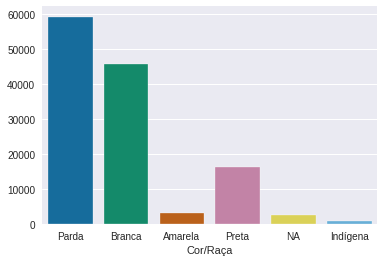

In [80]:
sns.countplot(Enem_dados['TP_COR_RACA'])
plt.xlabel('Cor/Raça')
plt.ylabel("")
plt.show();

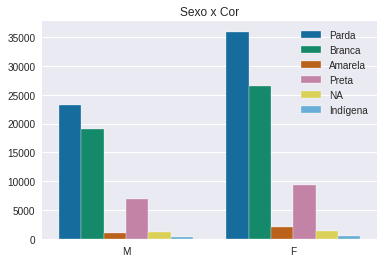

In [81]:
sns.countplot(Enem_dados['TP_SEXO'],hue=Enem_dados['TP_COR_RACA'], dodge=True)
plt.title('Sexo x Cor')
plt.xlabel('')
plt.ylabel("")
plt.legend(loc='best')
plt.show();

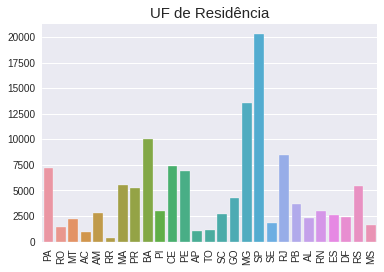

In [82]:
sns.countplot(Enem_dados['SG_UF_RESIDENCIA'], orient='h')
plt.title('UF de Residência', size=15)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show();

In [83]:
#Possui internet em casa?
Enem_dados['Q025'].value_counts()/Enem_dados.shape[0]*100

Sim    77.557701
Não    22.442299
Name: Q025, dtype: float64

In [84]:
#Escolaridade da mãe
Enem_dados['Q002'].value_counts()/Enem_dados.shape[0]*100

E    32.036426
B    16.782854
C    13.440886
D    13.133145
F    10.049458
G     7.883498
A     3.795729
H     2.878003
Name: Q002, dtype: float64

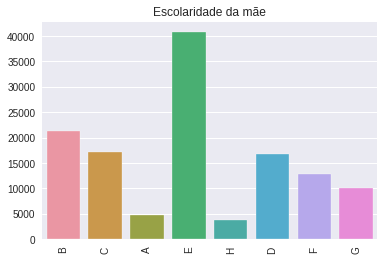

In [85]:
sns.countplot(Enem_dados['Q002'])
plt.title('Escolaridade da mãe')
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show();

In [86]:
#Renda da familia, incluindo a do aluno
Enem_dados['Q006'].value_counts()/Enem_dados.shape[0]*100

1497.00     25.588004
998.00      24.956822
1996.00      9.856335
2495.00      9.313079
3992.00      5.909091
0.00         4.584707
2994.00      4.427697
4990.00      3.780813
5988.00      2.788507
6986.00      1.647825
11976.00     1.203486
7984.00      1.163448
43615.58     1.127336
14970.00     1.041765
19960.00     0.888680
8982.00      0.866698
9980.00      0.855707
Name: Q006, dtype: float64

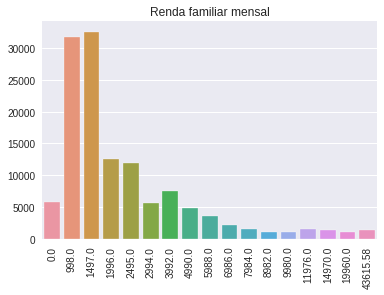

In [87]:
sns.countplot(Enem_dados['Q006'])
plt.title('Renda familiar mensal')
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show();

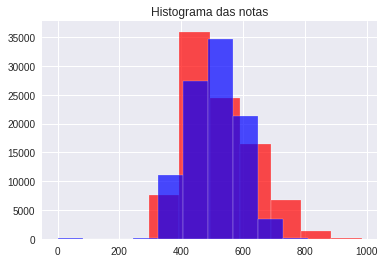

In [88]:
plt.hist(Enem_dados['NU_NOTA_MT'], alpha=0.7, color='red')
plt.hist(Enem_dados['NU_NOTA_CH'], alpha=0.7, color='blue')
plt.title('Histograma das notas')
plt.show();

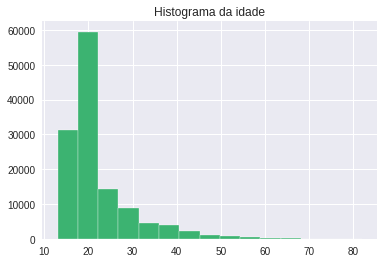

In [89]:
plt.hist(Enem_dados['NU_IDADE'],bins=15, histtype='bar', color='#3CB371')
plt.title('Histograma da idade')
plt.show();

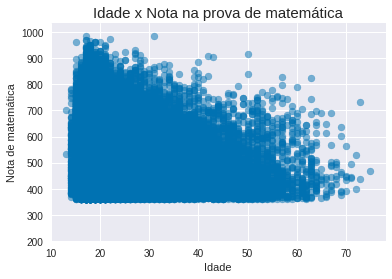

In [90]:
plt.scatter(Enem_dados['NU_IDADE'], Enem_dados['NU_NOTA_MT'], alpha=0.5)
plt.title("Idade x Nota na prova de matemática", size=15)
plt.xlabel("Idade")
plt.ylabel("Nota de matemática")
plt.ylim(200) #ignorando as notas = 0
plt.show();

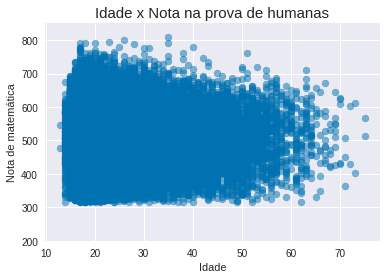

In [91]:
plt.scatter(Enem_dados['NU_IDADE'], Enem_dados['NU_NOTA_CH'], alpha=0.5)
plt.title("Idade x Nota na prova de humanas", size=15)
plt.xlabel("Idade")
plt.ylabel("Nota de matemática")
plt.ylim(200) #ignorando as notas = 0
plt.show();

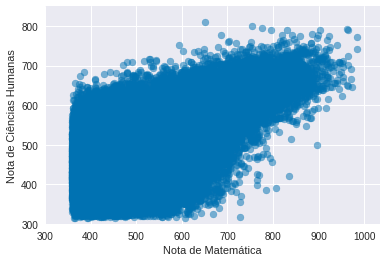

In [92]:
plt.scatter(Enem_dados['NU_NOTA_MT'], Enem_dados['NU_NOTA_CH'], alpha=0.5)
plt.xlim(300) #removendo as notas =0
plt.ylim(300) #removendo as notas =0
plt.xlabel("Nota de Matemática")
plt.ylabel("Nota de Ciências Humanas")
plt.show();

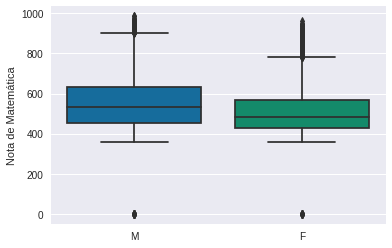

In [93]:
#fazer teste estatistico pra ver se tem diferença significativa entre os sexos
sns.boxplot(x=Enem_dados['TP_SEXO'], y=Enem_dados['NU_NOTA_MT'])
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show();



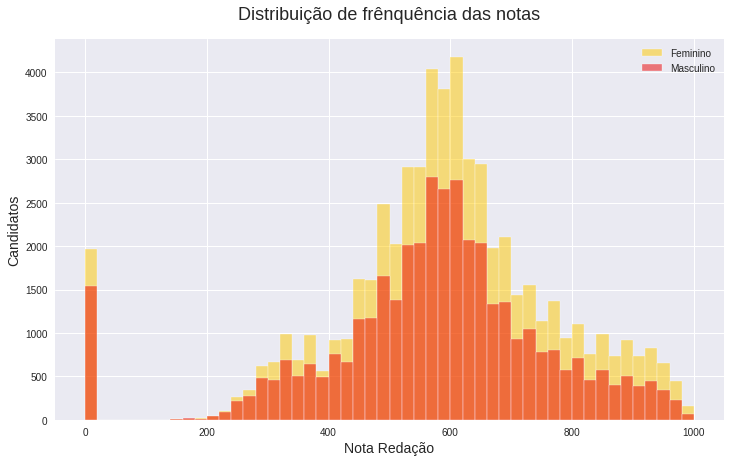

In [94]:
plt.figure(figsize=(12,7))
plt.title('Distribuição de frênquência das notas', pad=20, fontsize=18)
ax = sns.histplot(data = Enem_dados, x='NU_NOTA_REDACAO', hue='TP_SEXO', palette='hot',bins=50)
ax.legend(['Feminino','Masculino'])
#ax.legend(['Não declarado','Branca','Preta','Parda','Amarela','Indígena'])
ax.set_ylabel('Candidatos', fontsize=14)
ax.set_xlabel('Nota Redação', fontsize=14)
ax = ax;

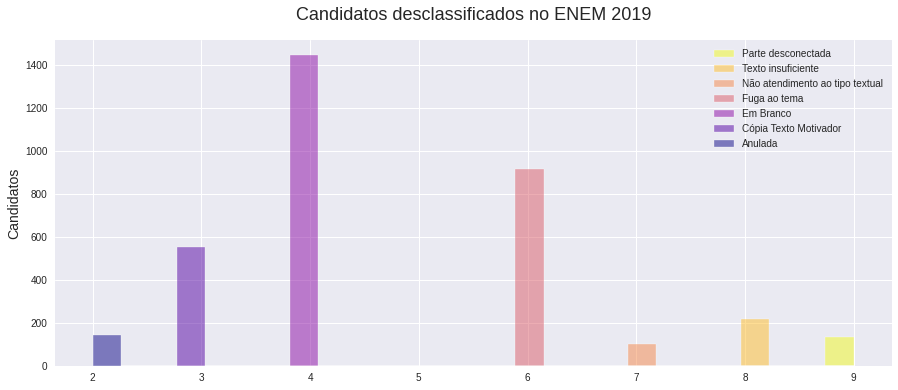

In [95]:
competencias = ('Anulada','Cópia Texto Motivador','Em Branco','Fuga ao tema','Não atendimento ao tipo textual','Texto insuficiente','Parte desconectada')

plt.figure(figsize=(15,6))
plt.title("Candidatos desclassificados no ENEM 2019", fontsize= 18, pad=20)
ax = sns.histplot(data = Enem_dados.query('NU_NOTA_REDACAO == 0.0'),
                  x = 'TP_STATUS_REDACAO',
                  hue='TP_STATUS_REDACAO',
                  legend=True,
                  palette='plasma')

ax.set_ylabel('Candidatos', fontsize=14)
ax.set_xlabel('', fontsize=14)
ax.legend(competencias[::-1],loc='upper right')
ax.grid(True)
ax = ax;

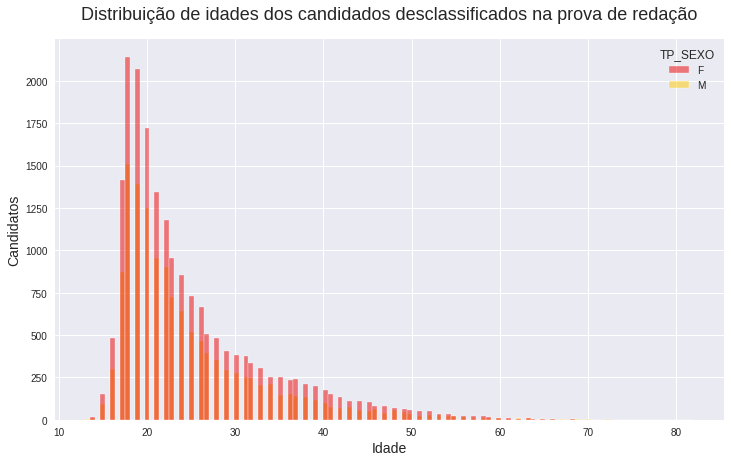

In [96]:
plt.figure(figsize=(12,7))
plt.title("Distribuição de idades dos candidados desclassificados na prova de redação", fontsize= 18, pad=20)
ax = sns.histplot(data = Enem_dados.query('TP_STATUS_REDACAO != 1.0 '), x='NU_IDADE', hue='TP_SEXO', palette='hot')
ax.set_xlabel('Idade', fontsize=14)
ax.set_ylabel('Candidatos', fontsize=14)
ax = ax;

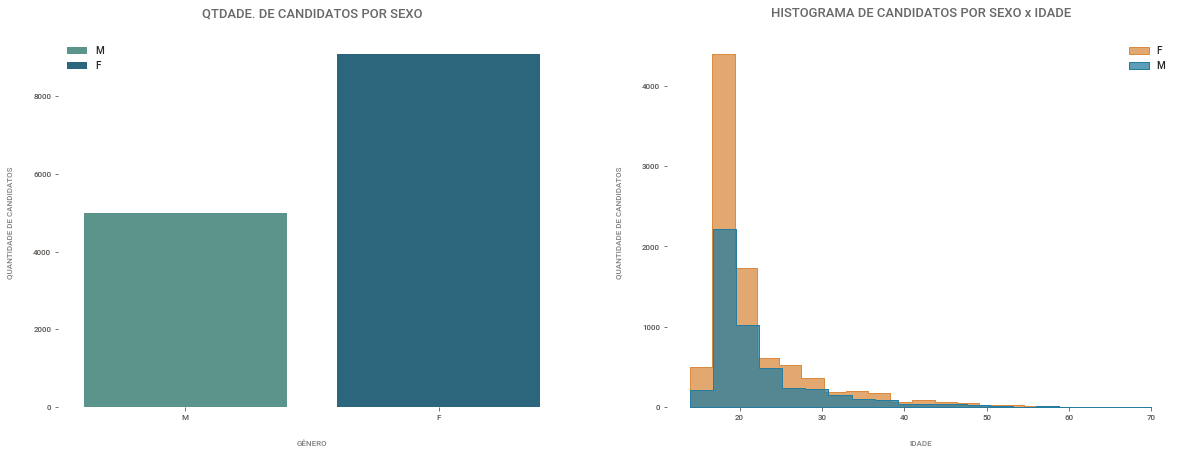

In [167]:
plt.figure(figsize=(20, 15))
s1 = plt.subplot(2, 2, 1)

s1 = sns.countplot(x = 'TP_SEXO', data = Enem_dados,
                    palette = 'crest', hue = 'TP_SEXO', dodge = False
                   )
s1 = plt.title('QTDADE. DE CANDIDATOS POR SEXO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s1 = sns.despine(bottom = True, left=True)
s1 = plt.xlabel('GÊNERO', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s1 = plt.legend(loc=2, labels=['M', 'F'])


##############

s2 = plt.subplot(2, 2, 2)

sns.histplot(Enem_dados[Enem_dados['TP_SEXO'] == 'F']['NU_IDADE'], bins = 20, label = 'F', element = 'step',
             color = '#da8b40')
sns.histplot(Enem_dados[Enem_dados['TP_SEXO'] == 'M']['NU_IDADE'], bins = 20, label = 'M', element = 'step',
             color = '#257ca0')


s2 = plt.title('HISTOGRAMA DE CANDIDATOS POR SEXO x IDADE',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s2 = sns.despine(bottom = True, left=True)
s2 = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
s2 = plt.legend();


In [168]:
# Selecionando as colunas de presenca e nota, agrupando pela presenca e somando a nota
Enem_dados[['TP_PRESENCA_CN', 'NU_NOTA_CN']].groupby('TP_PRESENCA_CN').sum() #quem é eliminado, zera a prova

,NU_NOTA_CN
TP_PRESENCA_CN,
0,0.0
1,5080898.9
2,0.0


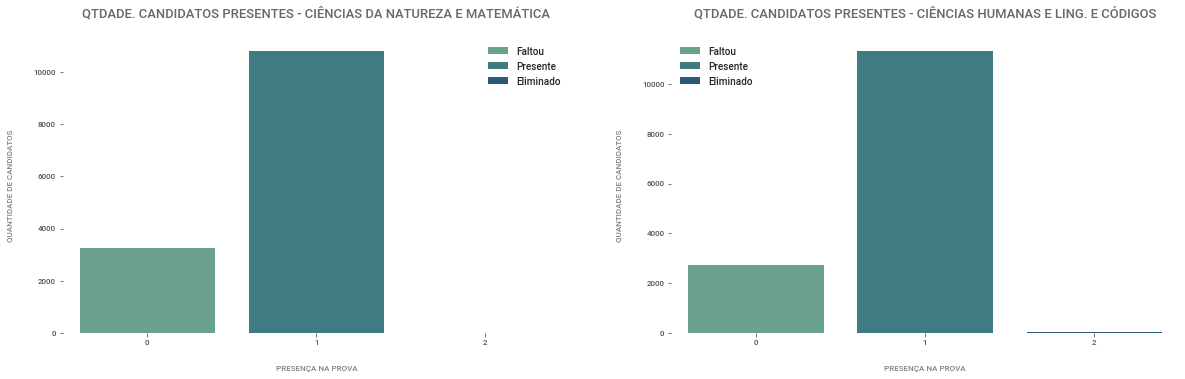

In [169]:
plt.figure(figsize=(20, 25))
#plt.subplots_adjust(hspace = 0.40)

ax2 = plt.subplot(4, 2, 2)
ax2 = sns.countplot(x = 'TP_PRESENCA_CH',data = Enem_dados,
                    palette = 'crest', hue = 'TP_PRESENCA_CH',
                   dodge = False)

ax2 = plt.title('QTDADE. CANDIDATOS PRESENTES - CIÊNCIAS HUMANAS E LING. E CÓDIGOS',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax2 = sns.despine(bottom = True, left=True)
ax2 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 20, fontsize = 8)
ax2 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
ax2 = plt.legend(labels=['Faltou', 'Presente', 'Eliminado'])
ax2 = plt.legend(loc=2, labels=['Faltou', 'Presente', 'Eliminado'])



#####

ax1 = plt.subplot(4, 2, 1)
ax1 = sns.countplot(x = 'TP_PRESENCA_CN',data = Enem_dados,
                    palette = 'crest', hue = 'TP_PRESENCA_CN',
                   dodge = False)

ax1 = plt.title('QTDADE. CANDIDATOS PRESENTES - CIÊNCIAS DA NATUREZA E MATEMÁTICA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax1 = sns.despine(bottom = True, left=True)
ax1 = plt.xlabel('PRESENÇA NA PROVA', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.ylabel('QUANTIDADE DE CANDIDATOS', color = 'grey', labelpad = 20, fontsize = 8)
ax1 = plt.legend(labels=['Faltou', 'Presente', 'Eliminado']);

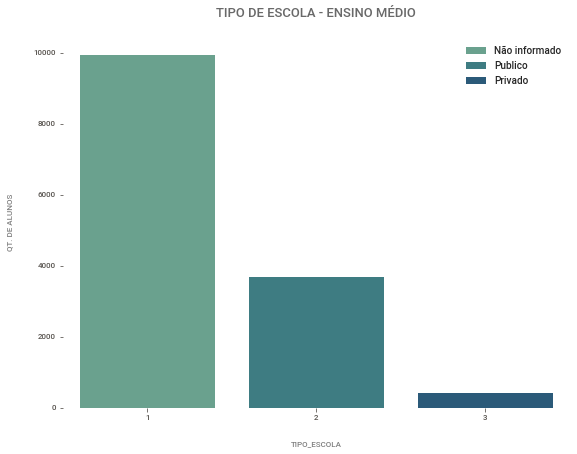

In [171]:
plt.figure(figsize=(20, 15))
s3 = plt.subplot(2, 2, 3)

s3 = sns.countplot(x = 'TP_ESCOLA', data = Enem_dados,
                    palette = 'crest', hue = 'TP_ESCOLA', dodge = False
                   )
s3 = plt.title('TIPO DE ESCOLA - ENSINO MÉDIO',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

s3 = sns.despine(bottom = True, left=True)
s3 = plt.xlabel('TIPO_ESCOLA', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.ylabel('QT. DE ALUNOS', color = 'grey', labelpad = 20, fontsize = 8)
s3 = plt.legend(loc=1, labels=['Não informado', 'Publico', 'Privado']);

A média das notas me matemática e nas notas da redação obedecem uma tendência de crescimento que acompanha o crescimento das escolaridade dos pais e das mães, ou seja, responsáveis mais escolarizados influenciam no aumento da nota dos alunos.


In [97]:
colunasSelecionadas = ['NU_INSCRICAO',
                       'NU_NOTA_MT','NU_NOTA_REDACAO', 
                       'Q001', 'Q002']

Criamos um novo DataFrame apenas com os dados que serão analisados:

In [98]:
EnemSelecionado = Enem_dados.filter(items=colunasSelecionadas)

In [99]:
EnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001004661,432.4,420.0,B,B
1,190001004674,NaN,400.0,C,C
2,190001004722,427.2,560.0,C,A
3,190001004735,499.9,500.0,E,C
4,190001004776,424.5,780.0,E,E


In [100]:
EnemSelecionado = EnemSelecionado.dropna()

In [101]:
EnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001004661,432.4,420.0,B,B
2,190001004722,427.2,560.0,C,A
3,190001004735,499.9,500.0,E,C
4,190001004776,424.5,780.0,E,E
5,190001004841,615.6,900.0,D,E


In [102]:
EnemSelecionado['SG_UF_RESIDENCIA'] = Enem_dados.SG_UF_RESIDENCIA.dropna()

In [103]:
EnemSelecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA
0,190001004661,432.4,420.0,B,B,PA
2,190001004722,427.2,560.0,C,A,PA
3,190001004735,499.9,500.0,E,C,PA
4,190001004776,424.5,780.0,E,E,PA
5,190001004841,615.6,900.0,D,E,PA


A tendência se repete se olharmos por Estado¶


In [104]:
Enem_dados.filter(items=['NU_NOTA_REDACAO','NO_Q002'])\
                        .where(Enem_dados.SG_UF_RESIDENCIA == 'RJ')\
                        .groupby('NO_Q002')\
                        .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,715.949821
"Completou a Faculdade, mas não completou a Pós-graduação",679.973856
"Completou o Ensino Médio, mas não completou a Faculdade",601.200645
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",566.239316
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",553.012380
Não completou a 4ª série/5º ano do Ensino Fundamental,529.172320
Não sei,527.337278
Nunca estudou,441.777778


In [105]:
Enem_dados.filter(items=['NU_NOTA_REDACAO','NO_Q002'])\
                        .where(Enem_dados.SG_UF_RESIDENCIA == 'PE')\
                        .groupby('NO_Q002')\
                        .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,662.806236
"Completou a Faculdade, mas não completou a Pós-graduação",650.528376
"Completou o Ensino Médio, mas não completou a Faculdade",577.424242
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",552.307692
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",522.779221
Não sei,514.461538
Não completou a 4ª série/5º ano do Ensino Fundamental,507.497360
Nunca estudou,471.878173


In [106]:
Enem_dados.filter(items=['NU_NOTA_REDACAO','NO_Q002'])\
                        .where(Enem_dados.SG_UF_RESIDENCIA == 'MG')\
                        .groupby('NO_Q002')\
                        .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação,708.576960
"Completou a Faculdade, mas não completou a Pós-graduação",682.179380
"Completou o Ensino Médio, mas não completou a Faculdade",609.236476
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",564.550898
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",557.124842
Não completou a 4ª série/5º ano do Ensino Fundamental,525.268353
Não sei,525.045045
Nunca estudou,459.551570


In [107]:

Enem_dados.filter(items=['SG_UF_RESIDENCIA','NU_NOTA_REDACAO','NO_Q002'])\
                        .groupby(['SG_UF_RESIDENCIA','NO_Q002'])\
                        .mean()

NU_NOTA_REDACAO
SG_UF_RESIDENCIA NO_Q002                                                            
AC               Completou a 4ª série/5º ano, mas não completou ...       504.186047
                 Completou a 8ª série/9º ano do Ensino Fundament...       516.000000
                 Completou a Faculdade, mas não completou a Pós-...       593.589744
                 Completou a Pós-graduação                                578.536585
                 Completou o Ensino Médio, mas não completou a F...       533.535354
...                                                                              ...
TO               Completou a Pós-graduação                                623.653846
                 Completou o Ensino Médio, mas não completou a F...       564.923077
                 Nunca estudou                                            442.666667
                 Não completou a 4ª série/5º ano do Ensino Funda...       483.423423
                 Não sei                                                  505.333333

[216 rows x 1 columns]

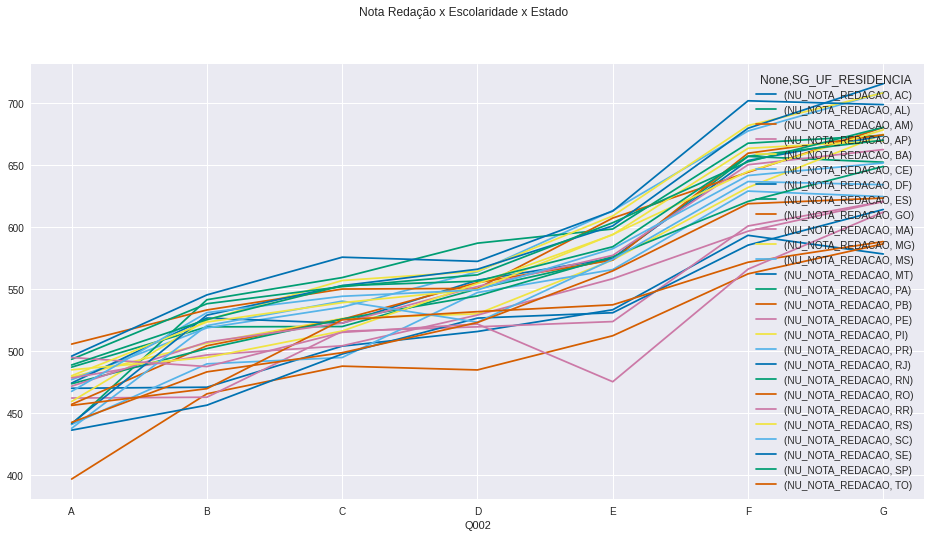

In [108]:
fig, ax = plt.subplots(figsize=(16,8))
plt.suptitle('Nota Redação x Escolaridade x Estado')

Enem_dados.filter(items=['SG_UF_RESIDENCIA','Q002','NU_NOTA_REDACAO'])\
                        .where(Enem_dados.Q002 != 'H')\
                        .groupby(['Q002', 'SG_UF_RESIDENCIA'])\
                        .mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
                        .unstack().plot(ax=ax);

distribuição da nota de redação dos candidatos

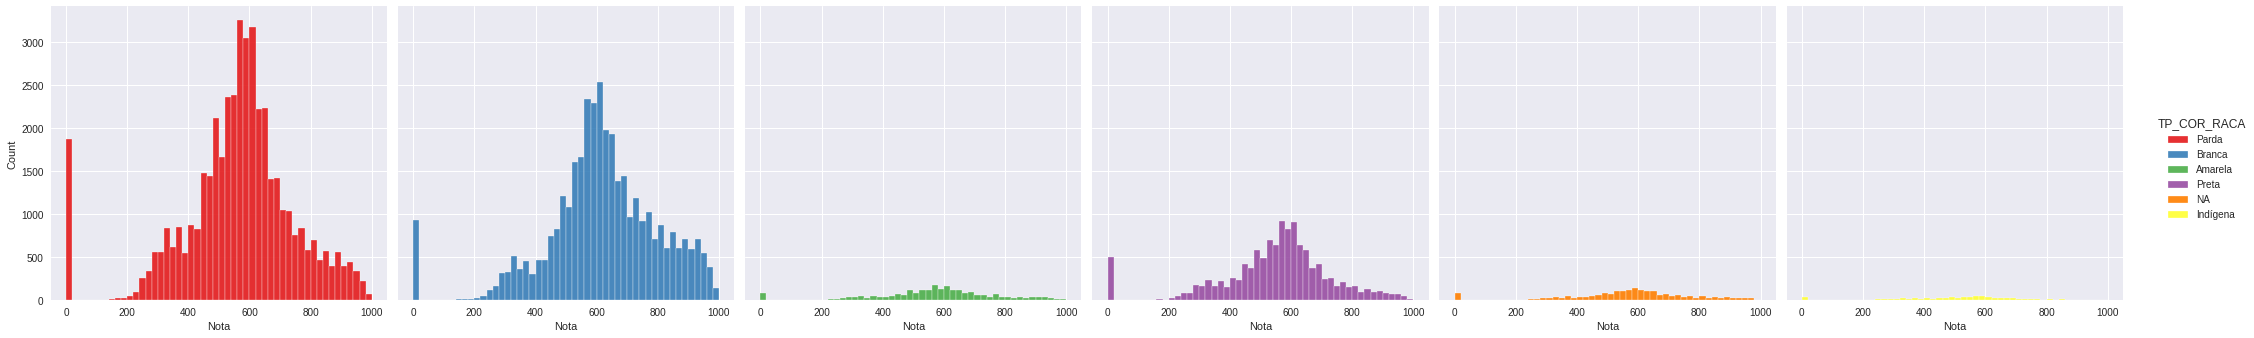

In [109]:
ax = sns.displot(data = Enem_dados.query('TP_COR_RACA != [0,4,5]'), x='NU_NOTA_REDACAO',
                 col='TP_COR_RACA', hue='TP_COR_RACA', palette='Set1', bins=50,
                 alpha=0.9).set_xlabels('Nota').set_titles('')
ax = ax;

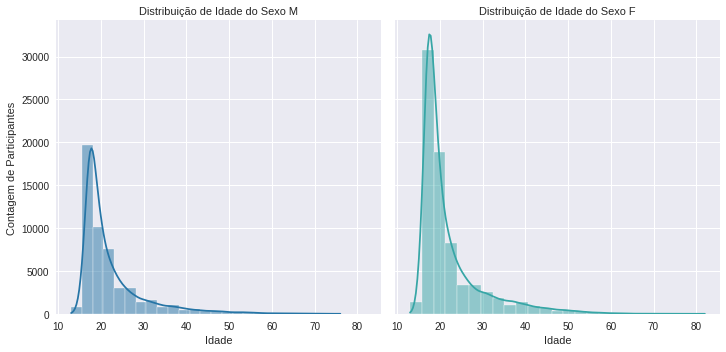

In [110]:
#criando grid de gráficos
d = {'color': ['#2675A6','#37A6A6']}
g = sns.FacetGrid(Enem_dados, col = 'TP_SEXO', hue='TP_SEXO', height=5, hue_kws=d);
g.map(sns.histplot, 'NU_IDADE', bins=25, kde = True);

#organizando o gráfico
g.set_axis_labels("Idade", "Contagem de Participantes");
g.set_titles(template='Distribuição de Idade do Sexo {col_name}');

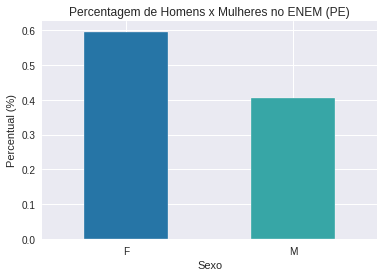

In [111]:
#plotando o gráfico
Enem_dados['TP_SEXO'].value_counts(normalize = True).plot.bar(rot = 0,color = ['#2675A6','#37A6A6'])
#organizado o gráfico
plt.title('Percentagem de Homens x Mulheres no ENEM (PE)');
plt.xlabel('Sexo')
plt.ylabel('Percentual (%)');

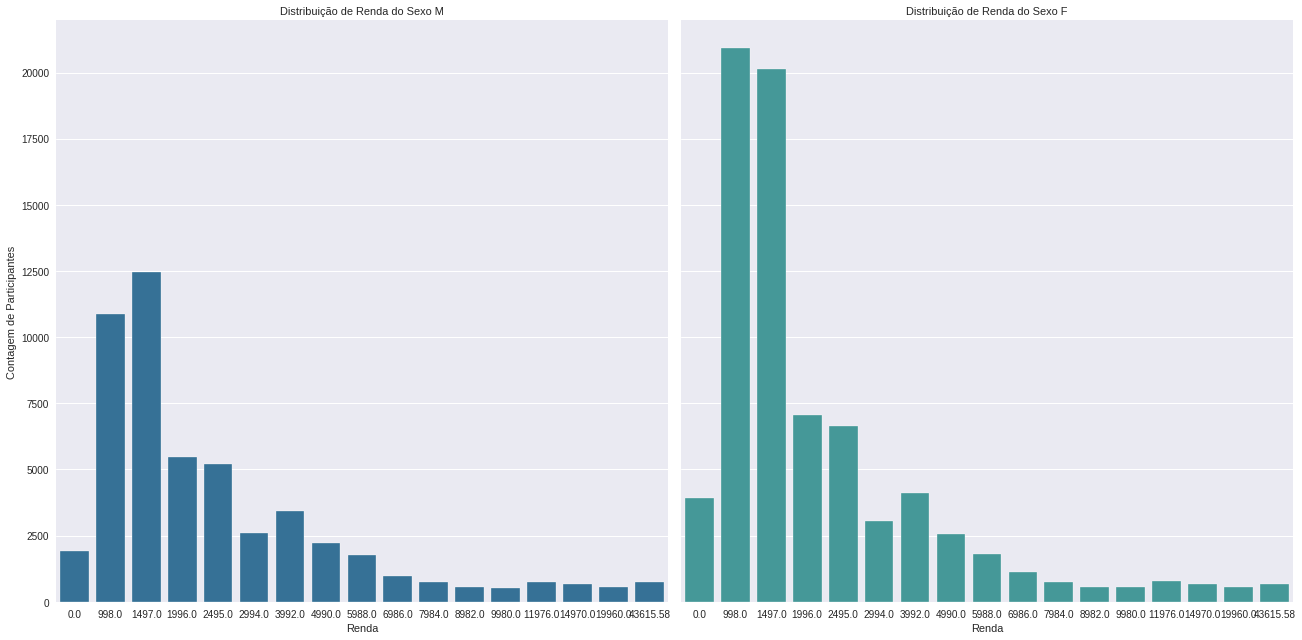

In [112]:
#criando coluna com dados de renda ordenados
dados_ordenados=Enem_dados['Q006'].unique()
dados_ordenados.sort()

#criando grid de gráficos
d = {'color': ['#2675A6','#37A6A6']}
g = sns.FacetGrid(Enem_dados, col = 'TP_SEXO', hue='TP_SEXO', height=9, hue_kws=d);
g.map(sns.countplot, 'Q006', order=dados_ordenados);

#organizando o gráfico
g.set_axis_labels("Renda", "Contagem de Participantes");
g.set_titles(template='Distribuição de Renda do Sexo {col_name}');

In [113]:
sexo = Enem_dados[['TP_SEXO', 'NU_NOTA_MT']]
sexo_f = sexo.query('TP_SEXO == "F"').drop('TP_SEXO',axis=1).dropna()
sexo_m = sexo.query('TP_SEXO == "M"').drop('TP_SEXO',axis=1).dropna()
print(sexo_f.shape[0])
print(sexo_m.shape[0])

55113
37645


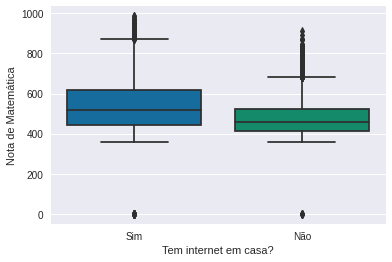

In [114]:

sns.boxplot(x=Enem_dados['Q025'], y=Enem_dados['NU_NOTA_MT'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota de Matemática")
plt.show();

In [115]:
internet = Enem_dados[['Q025', 'NU_NOTA_MT']]
internet_n = internet.query('Q025 == "Não"').drop('Q025',axis=1).dropna()
internet_s = internet.query('Q025 == "Sim"').drop('Q025',axis=1).dropna()
print(internet_n.shape[0])
print(internet_s.shape[0])

19615
73143


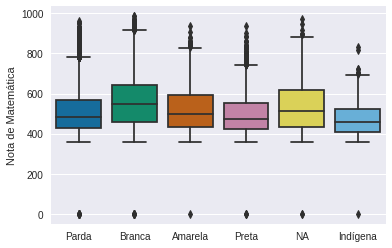

In [116]:
sns.boxplot(x=Enem_dados['TP_COR_RACA'], y=Enem_dados['NU_NOTA_MT'])
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show();

In [117]:
raca = Enem_dados[['TP_COR_RACA', 'NU_NOTA_MT']]
raca_b = raca.query('TP_COR_RACA == "Branca"').drop('TP_COR_RACA',axis=1).dropna()
raca_pa = raca.query('TP_COR_RACA == "Parda"').drop('TP_COR_RACA',axis=1).dropna()
raca_pr = raca.query('TP_COR_RACA == "Preta"').drop('TP_COR_RACA',axis=1).dropna()
raca_a = raca.query('TP_COR_RACA == "Amarela"').drop('TP_COR_RACA',axis=1).dropna()
raca_i = raca.query('TP_COR_RACA == "Indígena"').drop('TP_COR_RACA',axis=1).dropna()

print(raca_b.shape[0])
print(raca_pa.shape[0])
print(raca_pr.shape[0])
print(raca_a.shape[0])
print(raca_i.shape[0])

34436
42427
11374
2166
551


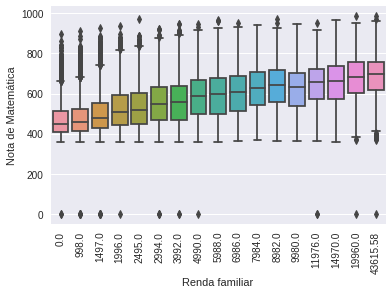

In [118]:
sns.boxplot(x=Enem_dados['Q006'], y=Enem_dados['NU_NOTA_MT'])
plt.xticks(rotation=90)
plt.xlabel("Renda familiar")
plt.ylabel("Nota de Matemática")
plt.show();

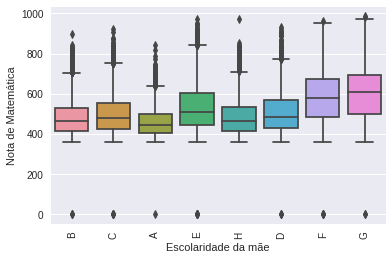

In [119]:
sns.boxplot(x=Enem_dados['Q002'], y=Enem_dados['NU_NOTA_MT'])
plt.xticks(rotation=90)
plt.xlabel("Escolaridade da mãe")
plt.ylabel("Nota de Matemática")
plt.show();

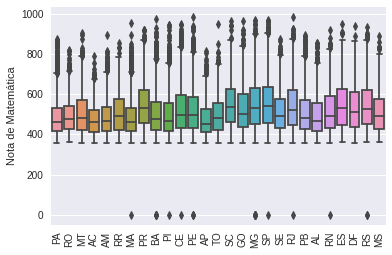

In [120]:
sns.boxplot(x=Enem_dados['SG_UF_RESIDENCIA'], y=Enem_dados['NU_NOTA_MT'])
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show();

In [137]:
Enem_dados['NU_IDADE'].describe()

count    127380.000000
mean         22.094355
std           7.498707
min          13.000000
25%          18.000000
50%          19.000000
75%          24.000000
max          82.000000
Name: NU_IDADE, dtype: float64

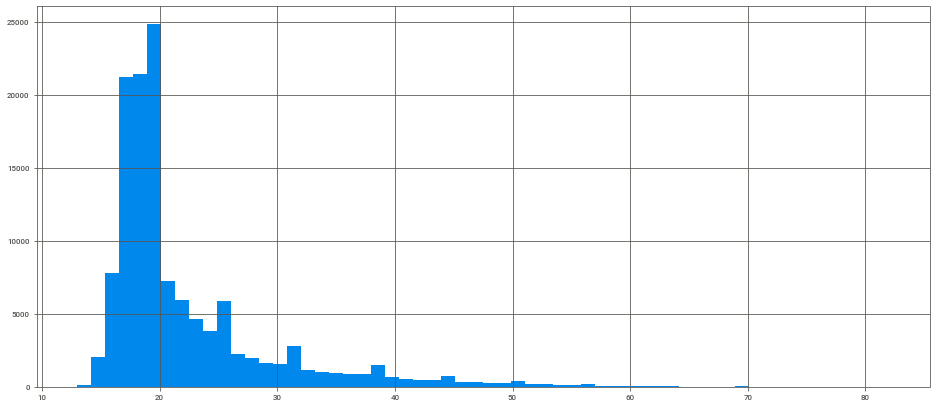

In [139]:
# É possível verificar que 75% dos alunos de alta performance tem menos de 20 anos
Enem_dados['NU_IDADE'].hist(bins = 58, figsize = (16,7));

In [141]:
dados_pe = Enem_dados.query('SG_UF_RESIDENCIA == "PE"')
dados_pe['NU_IDADE'].describe()

count    6941.000000
mean       21.941219
std         7.487839
min        14.000000
25%        17.000000
50%        19.000000
75%        23.000000
max        73.000000
Name: NU_IDADE, dtype: float64

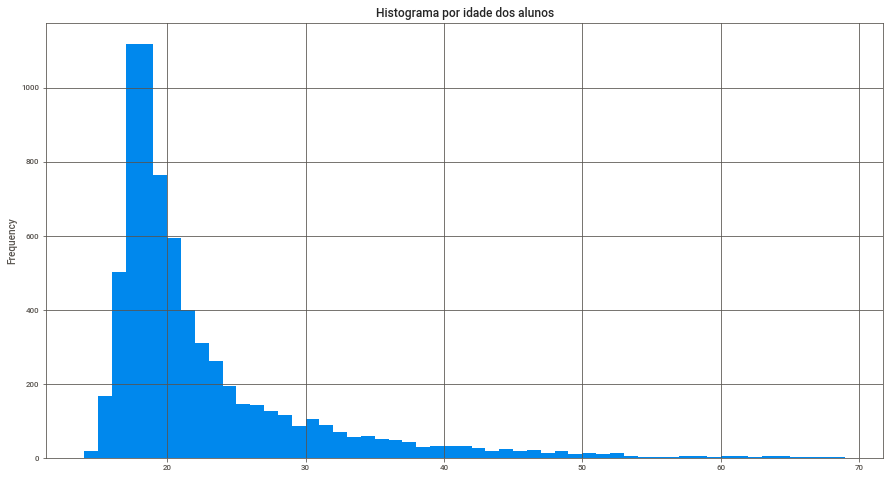

In [142]:
dados_pe['NU_IDADE'].plot.hist(range=(14,69), bins = 55, figsize = (15, 8))
plt.title('Histograma por idade dos alunos')
plt.show();

# ** Algumas informações extras**

# **MUDEI a COR de um DataFrame do Pandas**

In [121]:
Enem_dados_pe =EnemSelecionado[EnemSelecionado.SG_UF_RESIDENCIA =='PE'].tail(30)

In [122]:
# mostrando o valor mais alto, usando o style de cada coluna
Enem_dados_pe.style.highlight_max(subset=['NU_NOTA_REDACAO'])

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA
115954,190005638003,668.700000,740.000000,G,F,PE
115956,190005638025,359.600000,0.000000,C,E,PE
115957,190005638038,406.000000,480.000000,D,E,PE
120012,190005799629,635.700000,780.000000,E,E,PE
120217,190005808520,635.900000,620.000000,B,B,PE
120845,190005834429,547.800000,580.000000,B,B,PE
126827,190006078228,463.900000,580.000000,B,E,PE
126978,190006097914,397.200000,560.000000,C,B,PE
126979,190006097936,551.100000,520.000000,G,G,PE
127004,190006099180,526.800000,620.000000,E,E,PE


In [123]:
Enem_dados_pe.style.highlight_min(subset=['NU_NOTA_REDACAO'], color='red')

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA
115954,190005638003,668.700000,740.000000,G,F,PE
115956,190005638025,359.600000,0.000000,C,E,PE
115957,190005638038,406.000000,480.000000,D,E,PE
120012,190005799629,635.700000,780.000000,E,E,PE
120217,190005808520,635.900000,620.000000,B,B,PE
120845,190005834429,547.800000,580.000000,B,B,PE
126827,190006078228,463.900000,580.000000,B,E,PE
126978,190006097914,397.200000,560.000000,C,B,PE
126979,190006097936,551.100000,520.000000,G,G,PE
127004,190006099180,526.800000,620.000000,E,E,PE


In [124]:
Enem_dados_pe.style.background_gradient(cmap='Reds')

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA
115954,190005638003,668.700000,740.000000,G,F,PE
115956,190005638025,359.600000,0.000000,C,E,PE
115957,190005638038,406.000000,480.000000,D,E,PE
120012,190005799629,635.700000,780.000000,E,E,PE
120217,190005808520,635.900000,620.000000,B,B,PE
120845,190005834429,547.800000,580.000000,B,B,PE
126827,190006078228,463.900000,580.000000,B,E,PE
126978,190006097914,397.200000,560.000000,C,B,PE
126979,190006097936,551.100000,520.000000,G,G,PE
127004,190006099180,526.800000,620.000000,E,E,PE


In [125]:
Enem_dados_pe.style.background_gradient(cmap='coolwarm')

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA
115954,190005638003,668.700000,740.000000,G,F,PE
115956,190005638025,359.600000,0.000000,C,E,PE
115957,190005638038,406.000000,480.000000,D,E,PE
120012,190005799629,635.700000,780.000000,E,E,PE
120217,190005808520,635.900000,620.000000,B,B,PE
120845,190005834429,547.800000,580.000000,B,B,PE
126827,190006078228,463.900000,580.000000,B,E,PE
126978,190006097914,397.200000,560.000000,C,B,PE
126979,190006097936,551.100000,520.000000,G,G,PE
127004,190006099180,526.800000,620.000000,E,E,PE


In [126]:
Enem_dados_pe.style.set_properties(**{'background-color': 'black',
                                   'color': 'lawngreen',
                                   'border-color': 'white'})

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA
115954,190005638003,668.700000,740.000000,G,F,PE
115956,190005638025,359.600000,0.000000,C,E,PE
115957,190005638038,406.000000,480.000000,D,E,PE
120012,190005799629,635.700000,780.000000,E,E,PE
120217,190005808520,635.900000,620.000000,B,B,PE
120845,190005834429,547.800000,580.000000,B,B,PE
126827,190006078228,463.900000,580.000000,B,E,PE
126978,190006097914,397.200000,560.000000,C,B,PE
126979,190006097936,551.100000,520.000000,G,G,PE
127004,190006099180,526.800000,620.000000,E,E,PE


In [127]:
Enem_dados_pe.style.set_properties(**{'background-color': 'black',
                                   'color': 'white',
                                   'border-color': 'white'})

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA
115954,190005638003,668.700000,740.000000,G,F,PE
115956,190005638025,359.600000,0.000000,C,E,PE
115957,190005638038,406.000000,480.000000,D,E,PE
120012,190005799629,635.700000,780.000000,E,E,PE
120217,190005808520,635.900000,620.000000,B,B,PE
120845,190005834429,547.800000,580.000000,B,B,PE
126827,190006078228,463.900000,580.000000,B,E,PE
126978,190006097914,397.200000,560.000000,C,B,PE
126979,190006097936,551.100000,520.000000,G,G,PE
127004,190006099180,526.800000,620.000000,E,E,PE


In [128]:
# faz um destaque quando passa o mouse em cima, como um apontador
Enem_dados_pe.style.set_table_styles(
    [{'selector': 'tr:hover',
      'props':   [('background-color', 'red'), ('color','white')]}]                                         
)  

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA
115954,190005638003,668.700000,740.000000,G,F,PE
115956,190005638025,359.600000,0.000000,C,E,PE
115957,190005638038,406.000000,480.000000,D,E,PE
120012,190005799629,635.700000,780.000000,E,E,PE
120217,190005808520,635.900000,620.000000,B,B,PE
120845,190005834429,547.800000,580.000000,B,B,PE
126827,190006078228,463.900000,580.000000,B,E,PE
126978,190006097914,397.200000,560.000000,C,B,PE
126979,190006097936,551.100000,520.000000,G,G,PE
127004,190006099180,526.800000,620.000000,E,E,PE


In [129]:
# faz um destaque quando passa o mouse em cima, como um apontador
Enem_dados_pe.style.set_table_styles(
    [{'selector': 'tr:hover',
      'props':   [('background-color', 'black'), ('color','white')]}]                                         
)  

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA
115954,190005638003,668.700000,740.000000,G,F,PE
115956,190005638025,359.600000,0.000000,C,E,PE
115957,190005638038,406.000000,480.000000,D,E,PE
120012,190005799629,635.700000,780.000000,E,E,PE
120217,190005808520,635.900000,620.000000,B,B,PE
120845,190005834429,547.800000,580.000000,B,B,PE
126827,190006078228,463.900000,580.000000,B,E,PE
126978,190006097914,397.200000,560.000000,C,B,PE
126979,190006097936,551.100000,520.000000,G,G,PE
127004,190006099180,526.800000,620.000000,E,E,PE


In [130]:
# faz um destaque quando passa o mouse em cima, como um apontador
Enem_dados_pe.style.set_table_styles(
    [{'selector': 'tr:hover',
      'props':   [('background-color', 'yellow'), ('color','black')]}]                                         
)  

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_RESIDENCIA
115954,190005638003,668.700000,740.000000,G,F,PE
115956,190005638025,359.600000,0.000000,C,E,PE
115957,190005638038,406.000000,480.000000,D,E,PE
120012,190005799629,635.700000,780.000000,E,E,PE
120217,190005808520,635.900000,620.000000,B,B,PE
120845,190005834429,547.800000,580.000000,B,B,PE
126827,190006078228,463.900000,580.000000,B,E,PE
126978,190006097914,397.200000,560.000000,C,B,PE
126979,190006097936,551.100000,520.000000,G,G,PE
127004,190006099180,526.800000,620.000000,E,E,PE


In [131]:
Enem_dados.head(3)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NOTA_MEDIA,NO_Q001,NO_Q002
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,Parda,1,1506138.0,Redenção,15.0,PA,3,0,Não Respondeu,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,506.0,509.0,514.0,517.0,435.6,512.3,488.6,432.4,DACDDEDEDAADCBCBDBDBBBDCCACDECADCCCBCBACCCCEA,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,998.0,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,Sim,457.78,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,Parda,1,1504208.0,Marabá,15.0,PA,1,3,Não Respondeu,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504208,Marabá,15,PA,0,1,1,0,NaN,508.0,512.0,NaN,NaN,409.3,375.3,NaN,NaN,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,998.0,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,Sim,NaN,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,Branca,1,1501402.0,Belém,15.0,PA,1,12,Não Respondeu,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1501402,Belém,15,PA,1,1,1,1,503.0,508.0,512.0,515.0,423.2,499.1,441.0,427.2,DDEACAECCC*BCDBAACDACCBAEBBCEEEAECABBCECBBEAA,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAA

# **Gráfico de Corrida de Barras (Bar Chart Race)**

In [132]:
# Agrupa os dados
#transformar em dataframe
# desempinlha os indices
Enem_dados_bcr=pd.DataFrame(Enem_dados.groupby(['SG_UF_RESIDENCIA','NU_ANO']).sum()['NOTA_MEDIA']).unstack().T.droplevel(level=0)

In [133]:
Enem_dados_bcr

SG_UF_RESIDENCIA,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
NU_ANO,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019,329621.36,851378.46,856717.56,356945.28,3693846.5,2840014.78,903692.38,969903.82,1591911.26,2019355.66,5346412.58,585444.56,763071.8,2607977.44,1481022.14,2686603.02,1182424.38,2022721.44,3301826.22,1169447.32,468166.26,127379.04,2076028.86,1046454.72,730046.3,7941130.3,432633.98


In [135]:
!pip install bar-chart-race
import bar_chart_race as bcr

bcr.bar_chart_race(Enem_dados_bcr)

     |████████████████████████████████| 163kB 4.6MB/s 


# Sweetviz é uma biblioteca python que se concentra em explorar os dados com a ajuda de belas visualizações de alta densidade. Ele não apenas automatiza o EDA, mas também é usado para comparar conjuntos de dados e fazer inferências a partir deles.¶


In [136]:
my_report = sv.analyze(Enem_dados) # cria o reporte e chama de my_report
my_report.show_html()

# sv.anlyze(Enem_dados).show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# O pandas profiling é uma ferramenta que gera um relatório html com informações estatísticas e as principais características do seu dataframe em apenas uma linha de código¶


In [150]:
# Relatorio visual das colunas do dataframe
pandas_profiling.ProfileReport(Enem_dados,  title = "Relatório de criação de perfil do Pandas")

In [151]:
profile =pandas_profiling.ProfileReport(Enem_dados)

In [152]:
profile.to_file("Enem2019report.html")

# Autoviz é uma biblioteca python de código aberto que trabalha principalmente na visualização da relação dos dados, pode encontrar os recursos mais impactantes e traçar a visualização criativa em apenas uma linha de código. Autoviz é incrivelmente rápido e altamente útil.¶


Shape of your Data Set: (14058, 136)
Classifying variables in data set...
    136 Predictors classified...
        This does not include the Target column(s)
    37 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 28
Could not draw Distribution Plot
Could not draw Violin Plot
Number of Categorical and Continuous Vars exceeds limit, hence no Bar Plots
Time to run AutoViz (in seconds) = 3.551


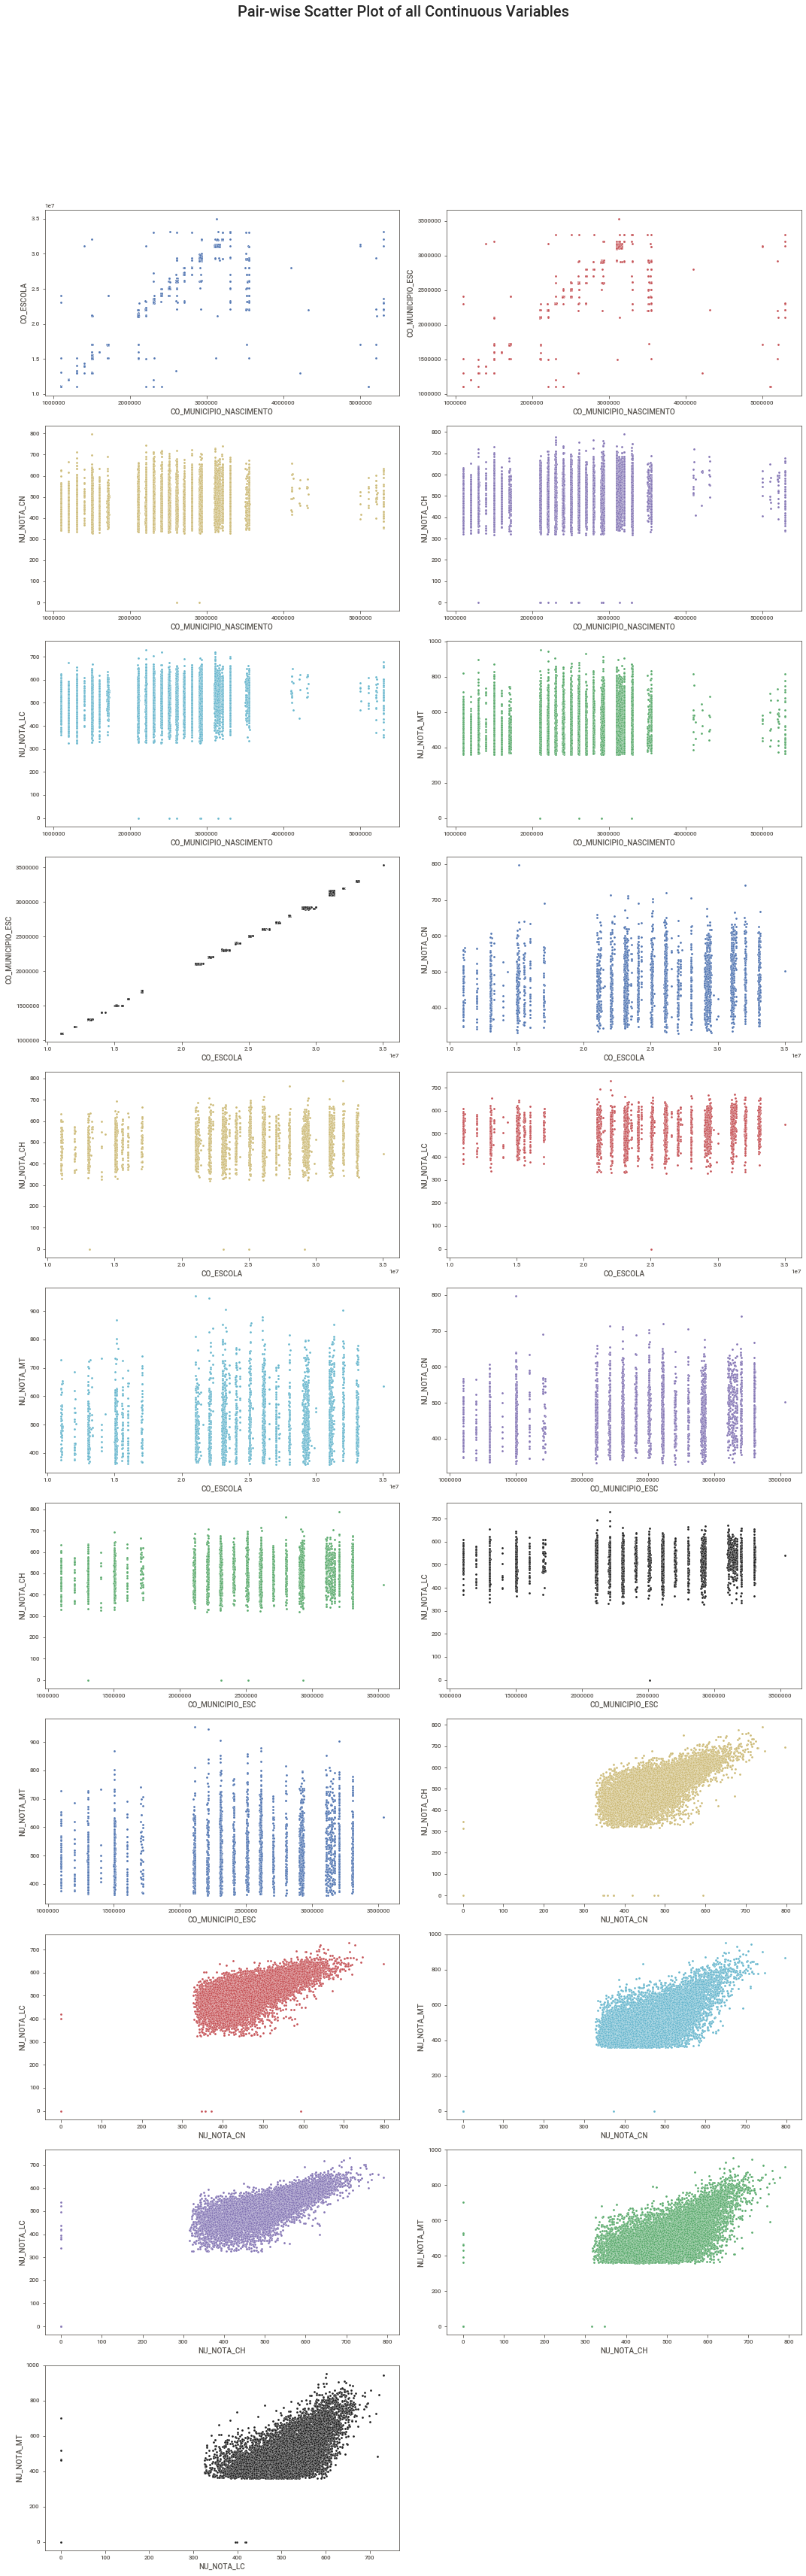

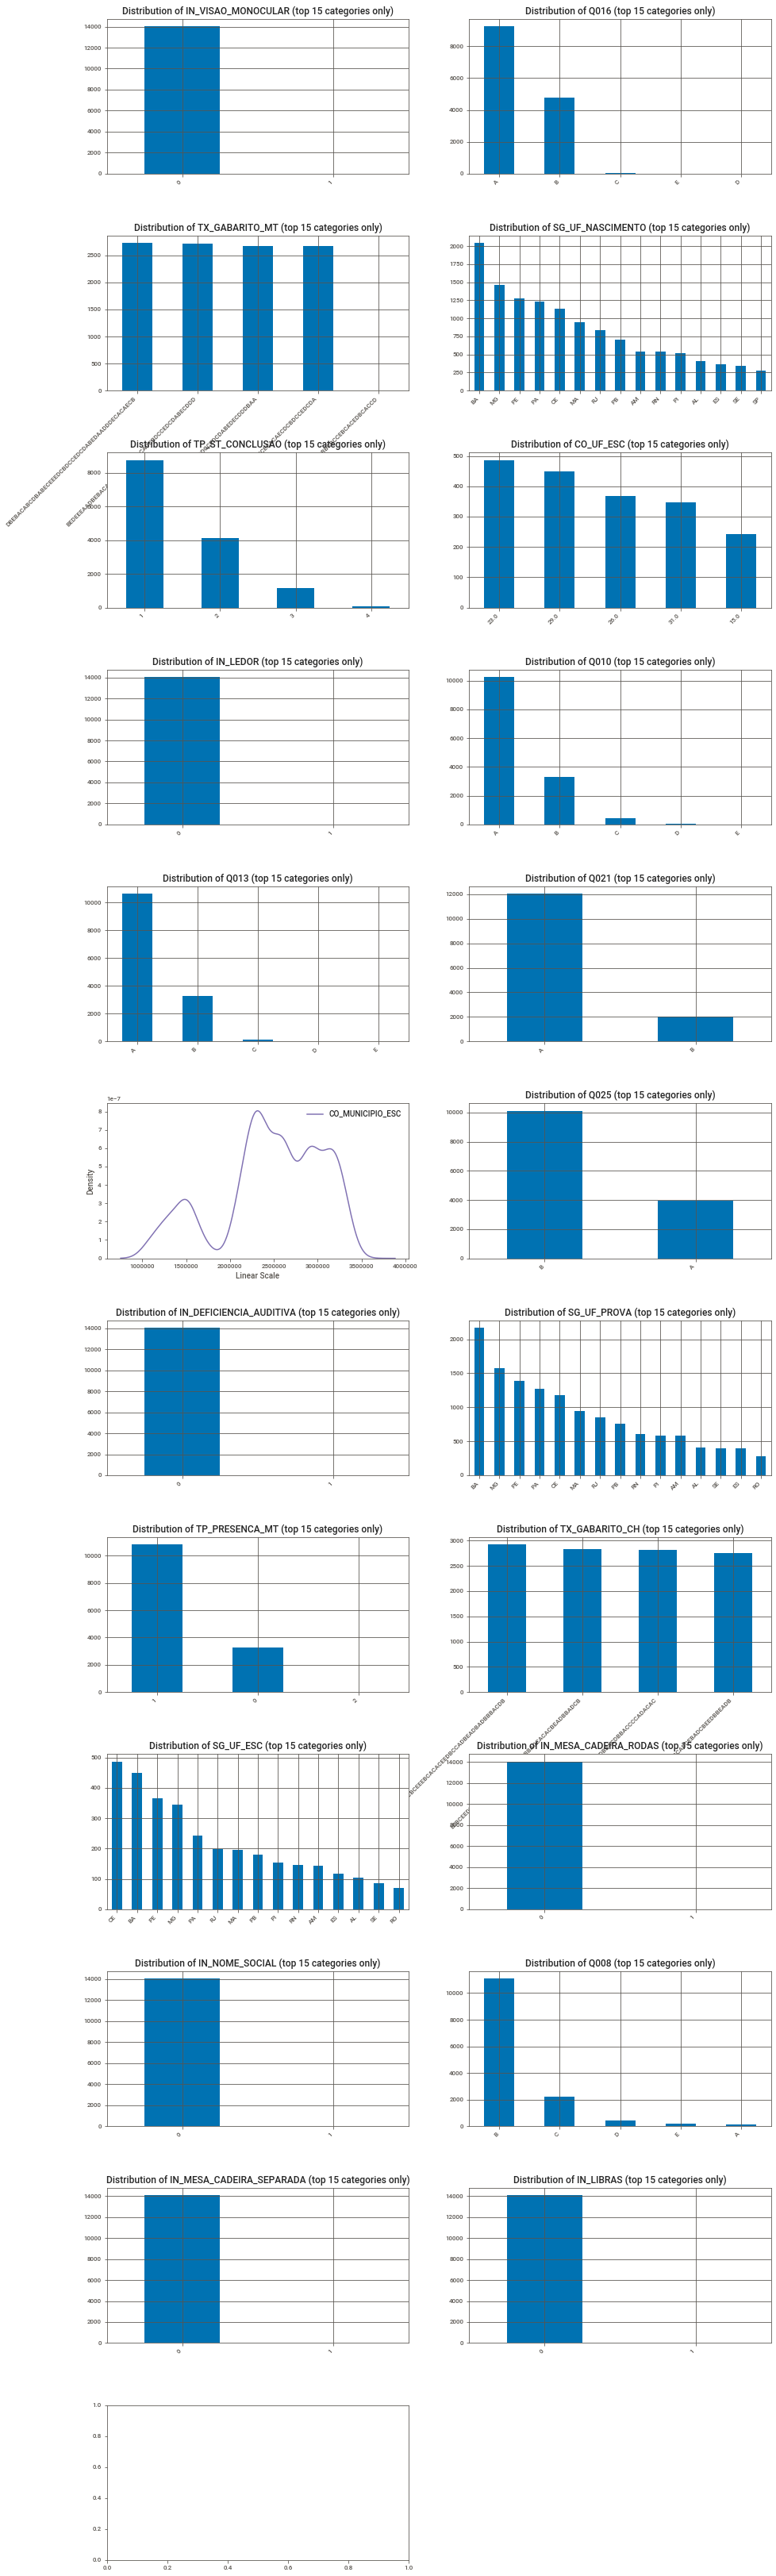

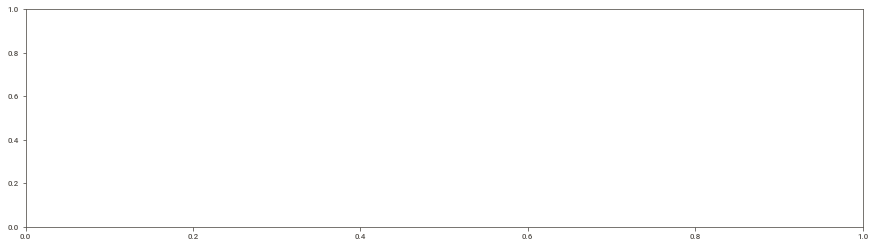

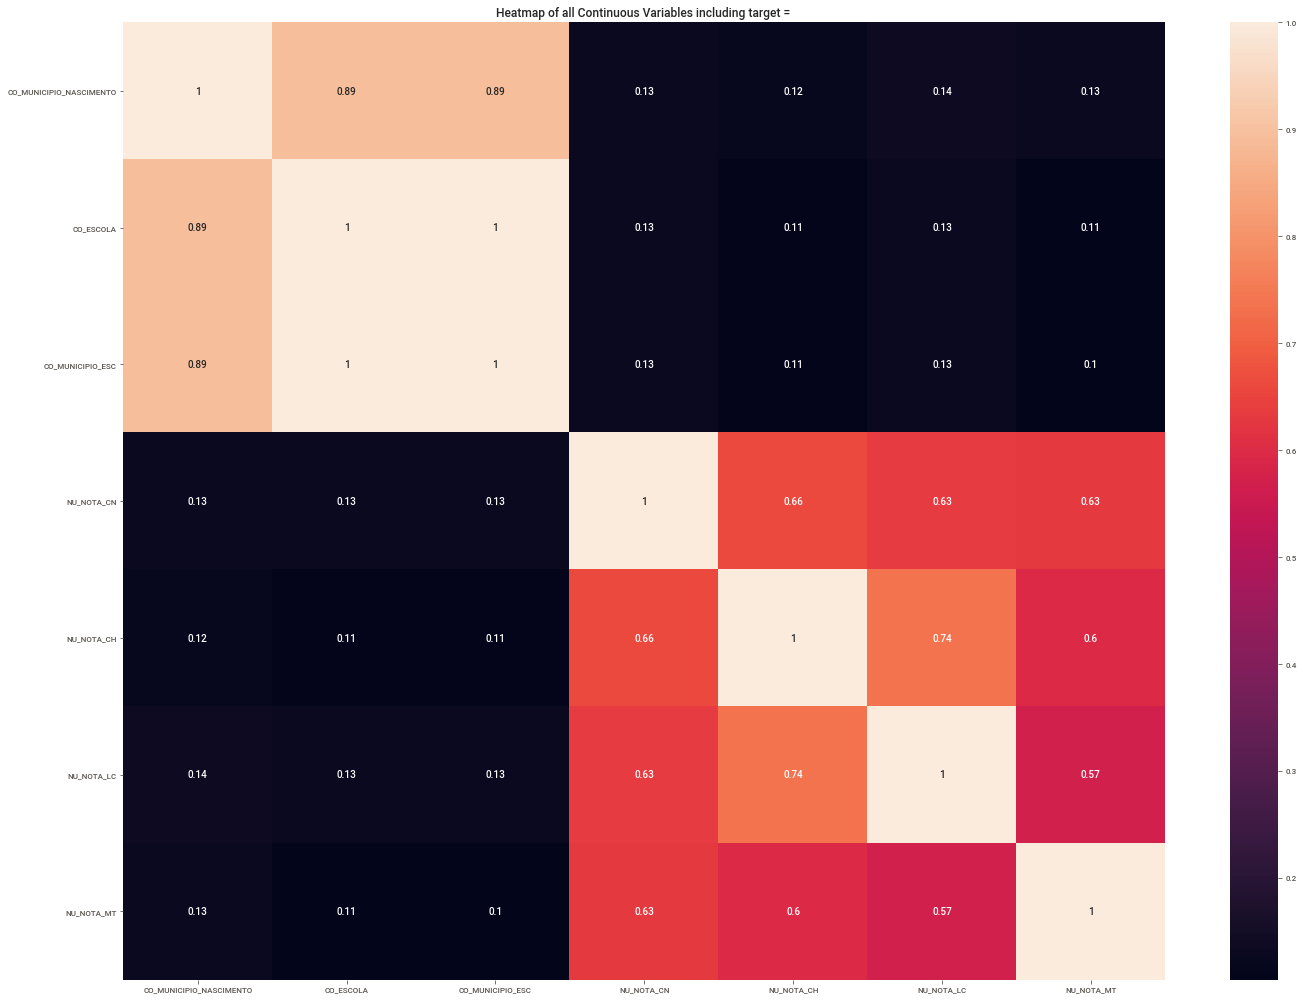

In [154]:
Enem_dados = AV.AutoViz ('MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

In [176]:
#Salvando o Dataframe:
Enem_dados.to_csv('Aanálise_Enem_2019.csv', sep=';', index=False)